# Analyze Traffic Safety Data with Python

In [2]:
import pandas as pd
import datetime as dt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
# setting plot theme and palette
sns.set_theme()
sns.set_palette('colorblind')

## Traffic data exploration

Note: The datasets were provided by codeacademy

### 1. Inspect the traffic safety dataset


In [3]:
# load dataset
traffic = pd.read_csv("traffic.csv")

# inspect first few rows
traffic.head()

,Date,Crashes_per_100k,Season
0,2006-01-01,169.176541,Winter
1,2006-02-01,154.028836,Winter
2,2006-03-01,159.930002,Spring
3,2006-04-01,155.741270,Spring
4,2006-05-01,168.179208,Spring


### 2. Inspect and format data types

The `traffic` data frame contains three columns: `Date`, `Crashes_per_100k`, and `Season`. In order to plot the `Crashes_per_100k` column as a time series, we need to make sure that the `Date` column is in date format. Let's inspect the data types in the data frame and then convert the `Date` column to date format, and recheck the data types a again to make sure it worked.

In [4]:
# inspect data types
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              180 non-null    object 
 1   Crashes_per_100k  180 non-null    float64
 2   Season            180 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.3+ KB


The traffic dataframe consists of 3 columns and 180 rows. There are no missing data. The number of crashes is normalized to the annual population per 100,000 people. Now let's format the 'Date' column. Converted the `Date` column to the date datatype using the `pd.to_datetime(column)` function.

In [5]:
# converted Date to date format
traffic['Date'] = pd.to_datetime(traffic['Date'])


# inspected data types
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              180 non-null    datetime64[ns]
 1   Crashes_per_100k  180 non-null    float64       
 2   Season            180 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.3+ KB


### 3. Visualize traffic safety data
To understand the trends that may exist in the data, we are going to use seaborn's `sns.lineplot()` function to create a line plot of the `traffic` data with `Date` on the x-axis and `Crashes_per_100k` on the y-axis.

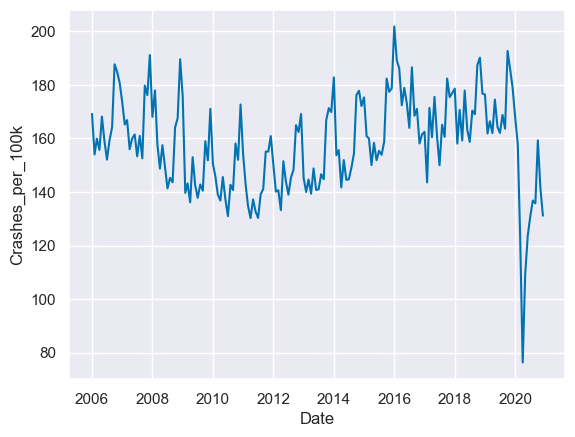

In [6]:
# created line plot
sns.lineplot(x="Date", y="Crashes_per_100k", data=traffic)
plt.show()

### Comments 
Looking at the line plot of our collision data, we can see the decreasing trend in crash rates from 2006 continuing until 2010 or 2011, and then crash rates begin increasing. The data for 2020 is very different from the preceding years. It could be due to Covid as people were in lockdown and couldn't drive and hence got very low crashes in year 2020. It is clearly an exceptional case or an anamoly.

There also appear to be some cyclical patterns, which may indicate differing crash rates seasonality.

### 4. Visualize seasonal rates

Since we observed a some variance in the number of collisions occurring throughout the year, we might hypothesize that the number of collisions increases or decreases during different seasons. We can visually explore this using a box plot. 

We are going to use `sns.boxplot()` with crash rate on the x-axis and season on the y-axis. Also, let's Remove the anomoly observed in the line chart in year 2020 data by removing the year 2020 from the data. 

In [7]:
clean_traffic = traffic[traffic.Date.dt.year != 2020]

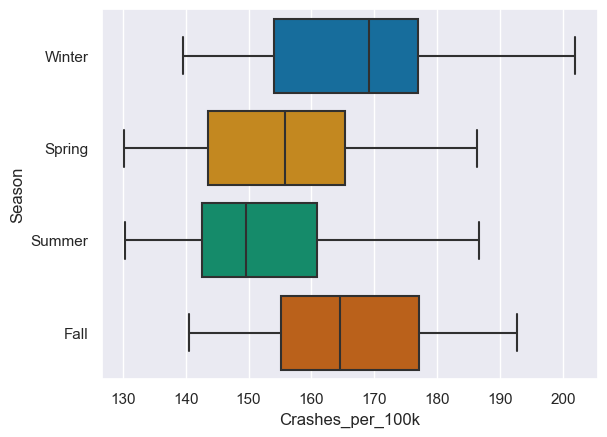

In [8]:
# created box plot by season
sns.boxplot(x="Crashes_per_100k", y="Season", data=clean_traffic)
plt.show()

It seems that Winter and Fall have higher crash rates than Spring and Summer. Seasons might be the reason for the pattern in crash rates.

## Smartphone data exploration

### 5. Inspect the smartphone use dataset

The dataset `crashes_smartphones.csv` contains smartphone data from Pew Research Center matched to normalized crash rates from the `traffic` data frame for the years 2011 to 2019.

* `Month_Year`: a shortened date with only the month and year of the survey
* `Crashes_per_100k`: the normalized crash rate matching the month and year of the smartphone usage survey
* `Season`: Winter, Spring, Summer, or Fall
* `Smartphone_Survey_Date`: the actual date the smartphone usage survey was conducted
* `Smartphone_usage`: the percent of survey participants that owned and used a smartphone



Load the dataset as `smartphones` and inspect the first few rows.

In [9]:
# imported dataset
smartphones = pd.read_csv("crashes_smartphones.csv")

# inspected first few rows
smartphones.head()

,Month_Year,Crashes_per_100k,Season,Smartphone_Survey_Date,Smartphone_usage
0,Apr-12,133.213685,Spring,4/3/12,46
1,Apr-15,150.077792,Spring,4/12/15,67
2,Apr-16,172.401948,Spring,4/4/16,72
3,Aug-12,145.403147,Summer,8/5/12,44
4,Dec-12,169.160811,Winter,12/9/12,45


### 6. Format date data type
Similar to the  `traffic` data frame, the `smartphones` data frame has a date column that is not properly formatted. Let's convert the `Smartphone_Survey_Date` column to the date data type using the `pd.to_datetime()` function and then inspect the data types in the data frame.

In [10]:
# change to datetime object
smartphones['Smartphone_Survey_Date'] = pd.to_datetime(smartphones['Smartphone_Survey_Date'])

# inspect data types
smartphones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Month_Year              28 non-null     object        
 1   Crashes_per_100k        28 non-null     float64       
 2   Season                  28 non-null     object        
 3   Smartphone_Survey_Date  28 non-null     datetime64[ns]
 4   Smartphone_usage        28 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.2+ KB


C:\Users\kapil\AppData\Local\Temp\ipykernel_1984\3694130434.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  smartphones['Smartphone_Survey_Date'] = pd.to_datetime(smartphones['Smartphone_Survey_Date'])



There is a lot less data available for smartphone usage rates than there was for crash rates. The `smartphones` dataframe consists of 5 columns and 28 rows. Luckily, there are no missing data to contend with.



### 7. Visualize smartphone use data
Now let's take a look at smartphone use over time. Create a line plot of the `smartphones` data with `Smartphone_Survey_Date` on the x-axis and `Smartphone_usage` on the y-axis.

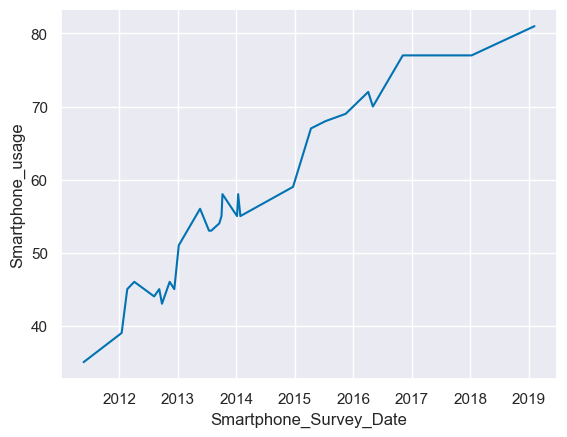

In [11]:
# create line plot
sns.lineplot(x="Smartphone_Survey_Date", y="Smartphone_usage", data=smartphones)
plt.show()

We can see a clear upward trend of smartphone usage increasing over time.


## Relationship exploration

### 8. Visualize crash rate by smartphone use
A scatter plot with smartphone usage on one axis and crash rates on the other axis will give us an idea of whether there is a relationship between these two variables or not. 

Created a scatter plot with a regression line using seaborn's `sns.regplot()` with `Smartphone_usage` on the x-axis and `Crashes_per_100k` on the y-axis.

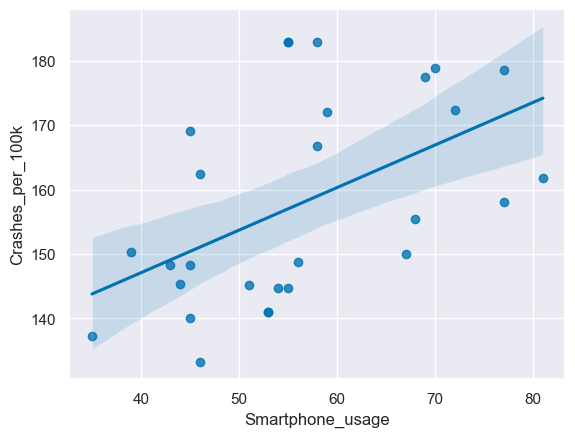

In [12]:
# create scatter plot with regression line
sns.regplot(x="Smartphone_usage", y="Crashes_per_100k", data=smartphones)
plt.show()


There appears to be a positive linear relationship between the rate of car crashes and the rate of adult smartphone usage in the U.S.


### 9. Check the correlation coefficient

To check whether there is a correlation between `Smartphone_usage` and `Crashes_per_100k`, we can calculate the Pearson's _r_ correlation coefficient and the associated _p_-value. 



In [13]:
# find Pearson's r and p-value
corr, p = pearsonr(smartphones.Smartphone_usage, smartphones.Crashes_per_100k)

# print corr and p
print("Pearson's r =",  round(corr,3))
print("p = ", round(p,3))

Pearson's r = 0.513
p =  0.005


The Pearson's r correlation coefficient is greater than 0.5, which indicates a moderately strong positive relationship. The p-value is less than 0.05. Together, this tells us that there is a statistically significant correlation between adult smartphone usage rates and car crash rates in the U.S. We have to be careful though: correlation does not mean causation. Many other factors may be contributing to the rise in car crash rates from 2011 to 2019. 


## Analysis

### 10. Run a linear regression
We can use a linear regression to predict crash rates based on smart phone usage. Let's regress crash rates on smartphone usage. Then we can predict the crash rate in 2020 and see if it matches the actual crash rate in 2020!

We have provided the code to convert the variables to NumPy arrays that will work with the modeling function. The `Smartphone_usage` array is saved as `X`, and the `Crashes_per_100k` array is saved as `y`.

Initiate the model by saving `LinearRegression()` to the variable `lm`. Then fit the model and run the regression with `.fit()`.

In [14]:
# convert columns to arrays
X = smartphones['Smartphone_usage'].to_numpy().reshape(-1, 1)
y = smartphones['Crashes_per_100k'].to_numpy().reshape(-1, 1)

In [16]:
# initiate the linear regression model
lm = LinearRegression()

# fit the model
lm.fit(X,y)

LinearRegression()

### 11. Print and interpret regression coefficients

Let's see the values our model has produced. Print the coefficients from our `lm` model. Then think about which parts of the regression line equation these values represent.

In [22]:
# printing the coefficients 
print("Coefficients: \n",lm.intercept_, lm.coef_)

Coefficients: 
 [120.6637106] [[0.66103316]]



The generic equation for a line is `y = b + (m * x)`, where `b` is the value where the the line intercepts the y-axis and `m` is the slope of the line. In this step, we learned the two coefficients of our linear model, `b = 120.6637` and `m = 0.6610`. So the equation for our linear model is `y = 120.6637 + (0.6610 * x)` and we can use this equation to predict new values of y from any new value of x.
    
We can also interpret the slope of 0.6610: every additional percentage point of smartphone usage is associated with an additional 0.6610 crashes per 100,000 people.


### 12. Make a prediction

Let's assume smartphone usage was the same for 2020 as it was for 2019. This is a reasonable asssumption since the increase in smartphone usage that we observed in our plot started to plateau at the end of the time series. Let's use this approximation and our regression model to predict the crash rate in 2020.

From our model output, the regression line equation is `Crashes_per_100k = 120.6637 + (0.6610 * Smartphone_usage)`. Run the provided code to view the smartphone usage rate for 2019. Then substitute this value into the equation, using Python as a calculator to predict the crash rate for 2020.

In [18]:
# get the smartphone usage rate from 2019
smartphones[smartphones['Month_Year'] == "Feb-19"].Smartphone_usage

7    81
Name: Smartphone_usage, dtype: int64

In [19]:
# predict the crash rate in 2020 using the regression equation
Crashes_per_100k = 120.6637 + (0.6610 * 81)
Crashes_per_100k

174.2047

If the smartphone usage rate was the same in 2020 as in 2019 (81%), our model predicts that the crash rate in 2020 would be 174.205 crashes per 100,000 people.  


### 13. Compare to the actual rate

Let's look at how good was our prediction? Get the actual crash rate for February of 2020 from the `traffic` dataframe using `pd.to_datetime("2020-02-01")` as the value for `Date`.

In [20]:
# get the actual crash rate in Feb 2020
traffic[traffic['Date'] == "2020-02-01"].Crashes_per_100k

169    157.88955
Name: Crashes_per_100k, dtype: float64

The actual crash rate in Februrary of 2020 was only 157.8895, which was a fair bit lower than our prediction. 


### 14. Visualize the prediction

Let's plot our regression plot again, but let's add two new points on top:

* The predicted 2020 crash rate
* The actual 2020 crash rate

Code has been provided for the original regression plot and a legend title. 

Add a scatter plot layer to add the 2020 predicted and actual crash rates that both used the 2019 smartphone usage rate. Use different colors and marker shapes for the predicted and actual 2020 crash rates.

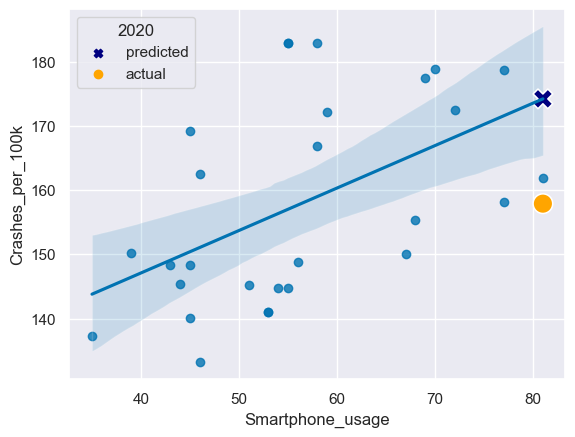

In [21]:
# recreated the regression plot we made earlier
sns.regplot(x = 'Smartphone_usage', y = 'Crashes_per_100k', data = smartphones)


sns.scatterplot(x=[81,81], y= [174.2047,157.88955 ], 
hue = ['predicted','actual'] , style = ['predicted','actual'], 
markers = ['X','o'], palette=['navy','orange'], s=200)

# add legend title
plt.legend(title='2020')
plt.show()

By adding another layer to our regression plot, we can see the difference between the predicted and real crash rates in February 2020. This allows us to see how these values compare to the rest of the dataset. 
